In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 16})
save_path = './'

def save(name):
    plt.savefig(save_path+name+'.png', dpi=800, bbox_inches='tight')

# Root finding

In [2]:
def bisection(f, a, b, steps=50, tol=1e-10, local=True):
    '''Given a function f, a starting initial interval [a,b],
    perform the bisection method for at most 'steps'
    iterations or the truncation error |f(xn)|<tol.
    
    Set the flag local=False to only store the most recent
    iteration.'''

    # init
    i = 0
    cn = [a, b]

    if f(a) < 0 and f(b) >=0:
        inds = [0, 1]
    elif f(a) >= 0 and f(b) < 0:
        inds = [1, 0]
    else:
        raise ValueError('Check initial guesses')
        
    # main loop
    while i < steps and np.abs(f(cn[-1])) > tol:
        c = (cn[inds[0]] + cn[inds[1]])/2  # midpoint
        cn.append(c)
        
        negative = (f(c) < 0)        
        if local:
            if negative:
                inds[0] = i+2  # replace negative with c
            else:
                inds[1] = i+2  # replace positive with c
        else:
            if negative:
                cn = [c, cn[1]]
            else:
                cn = [cn[0], c]
            inds = [0, 1]
        i+=1
    if local:
        return np.array(cn)
    else:
        return cn[-1]

[1.         4.         2.5        1.75       1.375      1.5625
 1.46875    1.421875   1.3984375  1.41015625 1.41601562 1.41308594
 1.41455078 1.41381836 1.41418457 1.41436768 1.41427612 1.41423035
 1.41420746 1.4142189  1.41421318 1.41421604 1.41421461 1.4142139
 1.41421354 1.41421372 1.41421363 1.41421358 1.41421356 1.41421357
 1.41421357 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356]
[-1.00000000e+00  1.40000000e+01  4.25000000e+00  1.06250000e+00
 -1.09375000e-01  4.41406250e-01  1.57226562e-01  2.17285156e-02
 -4.43725586e-02 -1.14593506e-02  5.10025024e-03 -3.18813324e-03
  9.53912735e-04 -1.11764669e-03 -8.20010900e-05  4.35922295e-04
  1.76952220e-04  4.74734697e-05 -1.72643340e-05  1.51044369e-05
 -1.07998130e-06  7.01221961e-06  2.96611711e-06  9.43067391e-07
 -6.84570836e-08  4.37305122e-07  1.84424011e-07  5.79834616e-08
 -5.23681143e-09  2.63733253e-08  1.05682569e-08  2.66572275e-09
 -1.28554434e-09  6.90089319e-10 -2.97727620e-10  1.96180849e-10
 -5.0

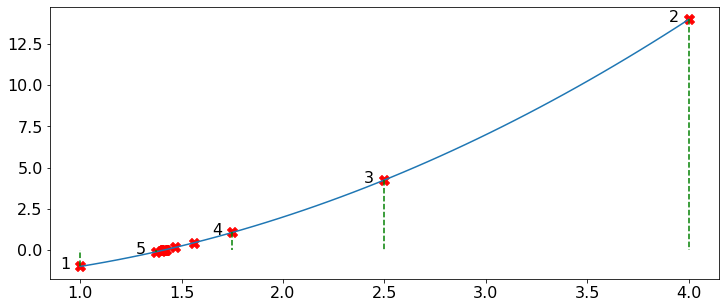

In [47]:
f = lambda x: x**2 - 2
fp = lambda x: 2*x

cn = bisection(f, 1, 4)
print(cn)
print(f(cn))
x = np.linspace(1, 4, 50)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(x, f(x))
ax.scatter(cn, f(cn), c='r', marker='X', s=100)
for i, x in enumerate(cn[:5]):
    ax.plot([x, x], [f(x), 0], c='g', ls='--')
    ax.text(x-.1, f(x)-.15, i+1)
save('Bisection')
plt.show()

In [7]:
def newton(f, fp, x0, steps=50, tol=1e-10, local=True):
    '''Given a function f, its derivative fp and a starting
    guess x0, perform Newton's method for at most 'steps'
    iterations or the truncation error |f(xn)|<tol.
    
    Set the flag local=False to only store the most recent
    iteration.'''
    # init
    i = 0
    xn = [x0]
    
    # main loop
    while i < steps and np.abs(f(xn[-1])) > tol:
        xn.append(xn[-1] - f(xn[-1])/fp(xn[-1]))  # Newton step
        
        if not local:
            xn.pop(0)
        i+=1

    if local:
        return np.array(xn)
    else:
        return xn[-1]

[5.         2.7        1.72037037 1.44145537 1.41447098 1.41421359
 1.41421356]


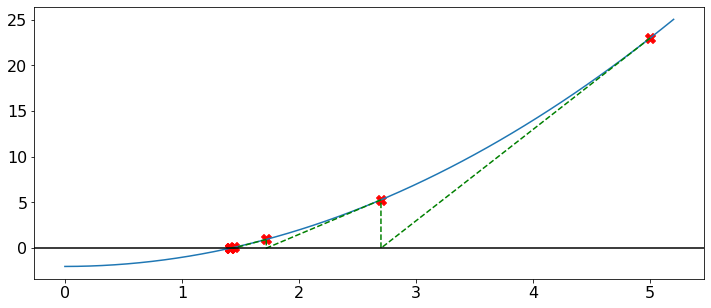

In [30]:
f = lambda x: x**2 - 2
fp = lambda x: 2*x

xn = newton(f, fp, 5)
print(xn)

x = np.linspace(0, 5.2, 50)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(x, f(x))
ax.scatter(xn, f(xn), c='r', marker='X', s=100)
for x, y in zip(xn[:-1], xn[1:]):
    ax.plot([x, y, y], [f(x), 0, f(y)], c='g', ls='--')
ax.axhline(0, c='k')
save('Newton')
plt.show()

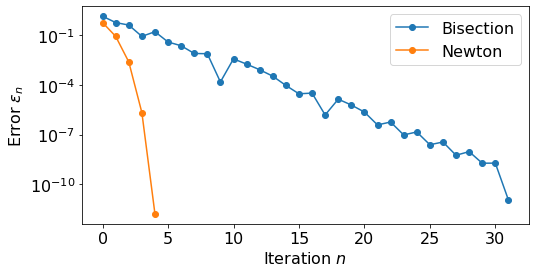

In [6]:
cn = bisection(f, 0, 2)
errB = np.abs(cn - np.sqrt(2))
xn = newton(f, fp, 2)
errN = xn - np.sqrt(2)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(errB, 'o-', label="Bisection")
ax.plot(errN, 'o-', label="Newton")
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Iteration $n$')
ax.set_ylabel(r'Error $\varepsilon_n$')
save('bisectionVsNewton')
plt.show()

# Forward Euler

In [71]:
def forward_Euler(dydt, y0, dt=0.5, T=3):
    # Time axis
    t_list = np.arange(0, T+dt/2, dt, dtype=np.float64)
    
    # Init
    y_list = [y0]
    y = y0

    for t in t_list[1:]:
        y = y + dt*dydt(t, y) # FE step
        y_list.append(y)
    
    return t_list, y_list

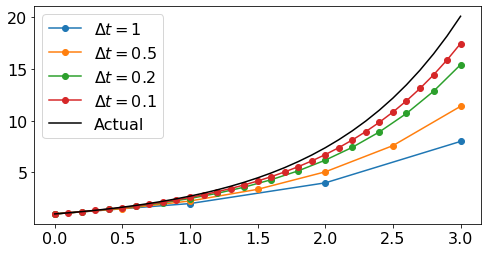

In [77]:
dydt = lambda t, y: y 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for dt in [1, 0.5, 0.2, 0.1]:
    t, yn = forward_Euler(dydt, 1, dt=dt)
    ax.plot(t, yn, '-o', label=f'$\Delta t={dt}$')
ax.plot(t, np.exp(t), c='k', label='Actual')
ax.legend()
save('forwardEuler')
plt.show()

# Diffusion solver

In [113]:
def diffusion_FE(phi_fn, k=1, dx=1, L=100, dt=0.01, T=50, snapshots=[]):
    '''Given initial condition phi_fn(np.array -> np.array), solve the
    diffusion equation using forward Eulerwith coef k on domain [0,L]
    with grid space dx. Simulate to time T with timestep dt. Save
    extra snapshots as a list of indices.'''
    assert dt <= dx**2/(2*k), "Unstable, check dt"
    
    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L, dx, dtype=np.float64)
    
    # IC
    phi = np.array(phi_fn(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = k*dt/dx**2
    
    # Matrix for FE
    M = (1-2*dtdx)*np.identity(n) + \
        dtdx*np.diag([1]*(n-1), 1) + \
        dtdx*np.diag([1]*(n-1), -1)
    
    # BC
    M[0,0], M[n-1,n-1] = 1, 1

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = M@phi  # FE step

    phi_list.append(phi)
    ts.append(t)
    return x, ts, phi_list

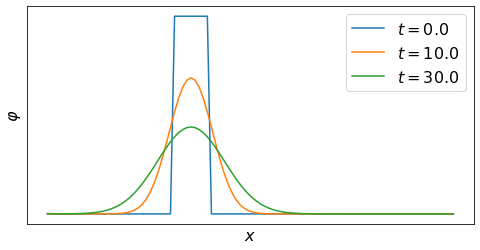

In [114]:
tophat = lambda x: (30<x) * (x<40)
x, t, phi_list = diffusion_FE(tophat, snapshots=[0, 1000, 3000])

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, phi in enumerate(phi_list[:-1]):
    ax.plot(x, phi, label=f'$t = {t[i]}$')
    
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\varphi$')
ax.legend()

save('diffusionSpreading2')
plt.show()

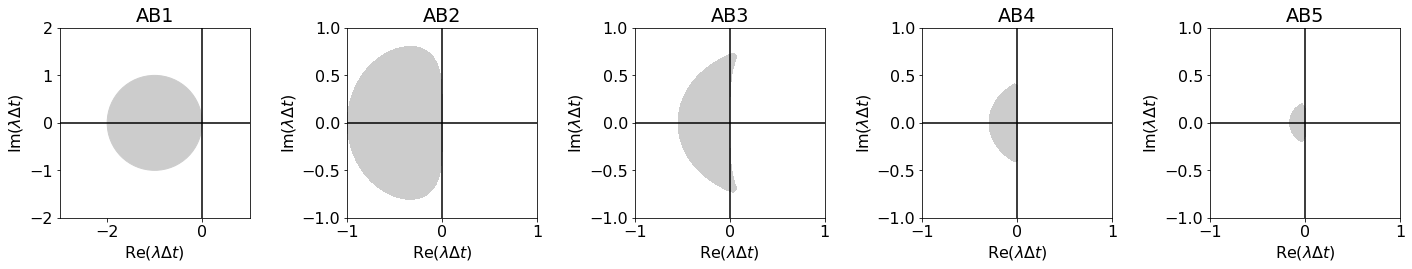

In [78]:
### Adapted from
# https://commons.wikimedia.org/wiki/File:Stability_region_for_BDF1.svg

plotWindow = {'realPart': [-2, 5], 'imagPart': [-3, 3]}

# Returns > 1 if argument is not in region of absolute stability
def AB2_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 3/2*dtLambda,
                      1/2 * dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB3_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 23/12*dtLambda,
                      16/12*dtLambda, -5/12*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB4_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 55/24*dtLambda,
                      59/24*dtLambda, -37/24*dtLambda, 9/24*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB5_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 1901/720*dtLambda,
                      2774/720*dtLambda, -2616/720*dtLambda,
                      1274/720*dtLambda, -251/720*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))



# AB3
x = np.linspace(*plotWindow['realPart'], num=200)
y = np.linspace(*plotWindow['imagPart'], num=100) 
[X, Y] = np.meshgrid(x, y)

Z_AB2 = np.zeros(X.shape)
Z_AB3 = np.zeros(X.shape)
Z_AB4 = np.zeros(X.shape)
Z_AB5 = np.zeros(X.shape)


for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        Z_AB2[m, n] = AB2_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB3[m, n] = AB3_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB4[m, n] = AB4_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB5[m, n] = AB5_stabilityFunction(X[m, n] + 1j * Y[m, n])

fig, axs = plt.subplots(1, 5, figsize=(20, 12))
shading = '0.8'

for ax in axs.reshape(-1):
    ax.set_aspect('equal')
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_xlabel(r'Re($\lambda\Delta t$)')
    ax.set_ylabel(r'Im($\lambda\Delta t$)')

ax = axs[0]
ax.axis([-3, 1, -2, 2])
ax.set_title('AB1')
ax.add_patch(plt.Circle((-1, 0), 1, color=shading))


ax = axs[1]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB2')
ax.contourf(X, Y, Z_AB2, [0, 1], colors=shading)


ax = axs[2]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB3')
ax.contourf(X, Y, Z_AB3, [0, 1], colors=shading)

ax = axs[3]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB4')
ax.contourf(X, Y, Z_AB4, [0, 1], colors=shading)

ax = axs[4]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB5')
ax.contourf(X, Y, Z_AB5, [0, 1], colors=shading)


fig.tight_layout()
plt.savefig(save_path+'ABstab.png', dpi=800, bbox_inches='tight')
plt.show()